# How to build your first Neural Network to predict house prices with Keras

In [33]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import requests
from io import StringIO


In [2]:
# URL of the CSV file to download
url = "https://drive.usercontent.google.com/u/0/uc?id=1GfvKA0qznNVknghV4botnNxyH-KvODOC&export=download"

response = requests.get(url)

if response.ok:
  data = response.content.decode('utf8')
  df = pd.read_csv(StringIO(data))

  print(df.shape)

else:
  print("Error fetching file: ", response.status_code)
# df = pd.read_csv('housepricedata.csv')


(1460, 11)


In [4]:
df.describe()


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


We convert a DataFrame to a NumPy array for better performance, compatibility with ML libraries, and memory efficiency.

In [6]:
#convert it into arrays
dataset = df.values
dataset


array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [7]:
# Select all rows and the first 10 columns from the dataset
X = dataset[:, 0:10]


In [8]:
# Select all rows and the 11th column (index 10) from the dataset
Y = dataset[:, 10]


In [12]:
# Initialize the MinMaxScaler and scale X to the range [0, 1]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

# Validation vs. Test Sets
Validation Set: A subset of the data used during training to tune hyperparameters and make adjustments. It helps in selecting the best model configuration.
Test Set: A separate subset used after training to evaluate the final model's performance. It provides an unbiased measure of how well the model generalizes to new, unseen data.

In [13]:
# Split the scaled features (X_scale) and target variable (Y) into training and validation+test sets (70% train, 30% val+test)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [14]:
# Further split the validation+test set into validation and test sets (50% validation, 50% test)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [16]:
!pip install keras


In [17]:
from keras.models import Sequential
from keras.layers import Dense

# Define a neural network model with:

An input layer with 10 features and 32 neurons (ReLU activation)
A hidden layer with 32 neurons (ReLU activation)
An output layer with 1 neuron (Sigmoid activation for binary classification)

In [18]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

# Compile the model with:

Stochastic Gradient Descent (SGD) optimizer
Binary Crossentropy loss function (for binary classification)
Accuracy as the evaluation metric

In [19]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with:

Training data (X_train, Y_train)
Batch size of 32 and 100 epochs
Validation data (X_val, Y_val) to monitor performance during training

In [20]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Epoch 1/100
32/32 [==============================] - 3s 12ms/step - loss: 0.6985 - accuracy: 0.4902 - val_loss: 0.6928 - val_accuracy: 0.5205
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4912 - val_loss: 0.6872 - val_accuracy: 0.5205
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.4941 - val_loss: 0.6817 - val_accuracy: 0.5388
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6823 - accuracy: 0.5108 - val_loss: 0.6758 - val_accuracy: 0.5571
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.5284 - val_loss: 0.6698 - val_accuracy: 0.6119
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.6057 - val_loss: 0.6634 - val_accuracy: 0.6804
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.6908 - val_loss: 0.6568 - val_accuracy: 0.7260
Epoch 8/100


In [21]:
# Evaluate the model on the test set (X_test, Y_test) and return the accuracy
model.evaluate(X_test, Y_test)[1]


7/7 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.8904


0.8904109597206116

# visualize how the model's loss evolves during training and validation.
hist.history['loss'] is the training loss.
hist.history['val_loss'] is the validation loss.

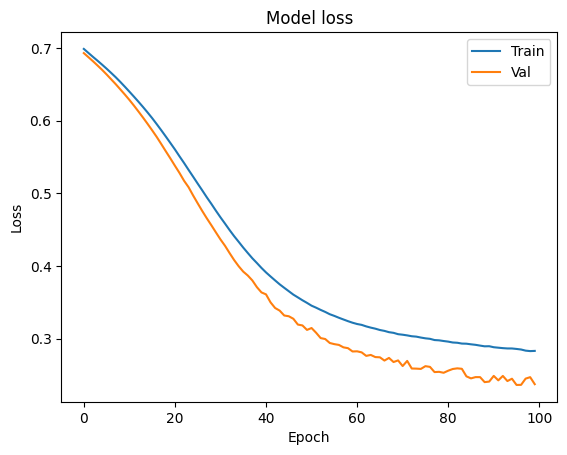

In [24]:

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


# This plot shows how the model's accuracy improves during training and validation.
hist.history['accuracy'] is the training accuracy
hist.history['val_accuracy'] is the validation accuracy

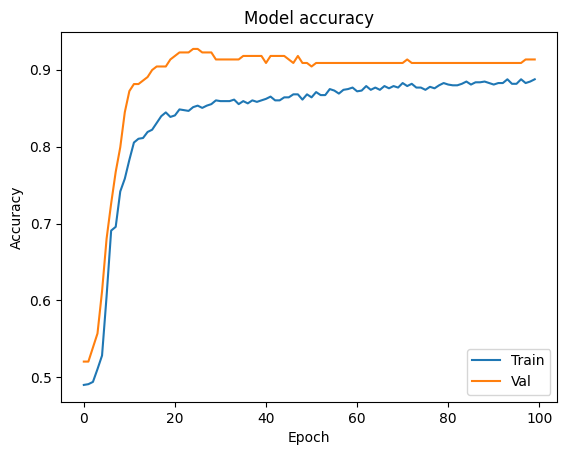

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


# Adding Regularization to Neural Network
The new model (model_2) has increased complexity with more layers and neurons.
 This step helps the model learn more intricate patterns from the data. We compile and train it to evaluate if the added complexity improves performance.

In [26]:
#Adding regularization to our neural network
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 56ms/step - loss: 0.4896 - accuracy: 0.7720 - val_loss: 0.3454 - val_accuracy: 0.8995
Epoch 2/100
32/32 [==============================] - 2s 50ms/step - loss: 0.3519 - accuracy: 0.8454 - val_loss: 0.2474 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 2s 47ms/step - loss: 0.3238 - accuracy: 0.8640 - val_loss: 0.2143 - val_accuracy: 0.9178
Epoch 4/100
32/32 [==============================] - 2s 58ms/step - loss: 0.3012 - accuracy: 0.8689 - val_loss: 0.2802 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 2s 73ms/step - loss: 0.3192 - accuracy: 0.8679 - val_loss: 0.1973 - val_accuracy: 0.9224
Epoch 6/100
32/32 [==============================] - 2s 55ms/step - loss: 0.2665 - accuracy: 0.8855 - val_loss: 0.2347 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 1s 46ms/step - loss: 0.2856 - accuracy: 0.8708 - val_loss: 0.2023 - val_accuracy: 0.9178
Epoch 

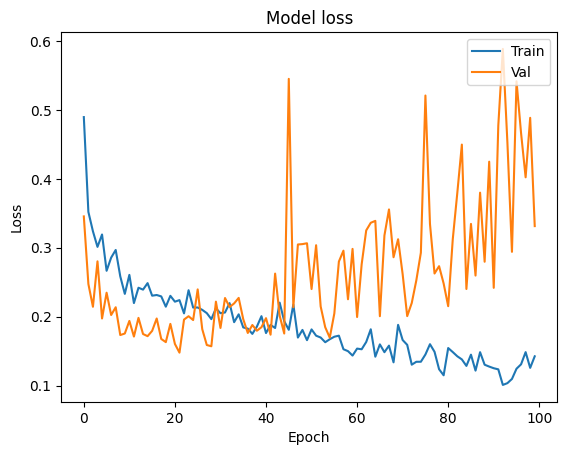

In [27]:
# Plot training and validation loss over epochs for the new model
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


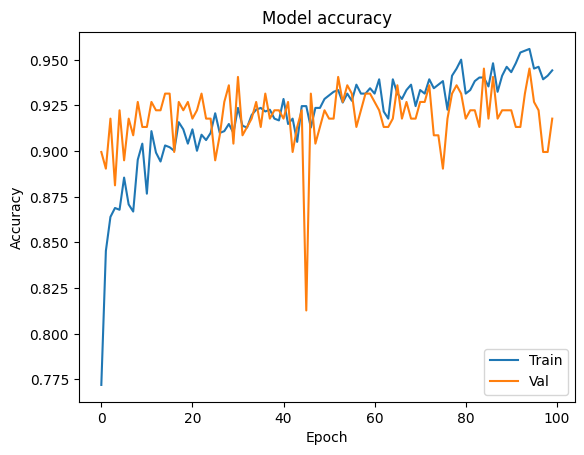

In [28]:
# Plot training and validation accuracy over epochs
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


# Adding Dropout and Regularizers
Dropout: Prevents overfitting by randomly setting a fraction of inputs to zero during training, promoting robust feature learning.

Regularizers: Add penalties to the loss function to constrain model complexity and avoid overfitting.

In [30]:
from keras.layers import Dropout
from keras import regularizers

In [31]:
#Adding regularization to our neural network
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])


model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 6s 92ms/step - loss: 14.2285 - accuracy: 0.6321 - val_loss: 3.9066 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 2s 55ms/step - loss: 1.7068 - accuracy: 0.7554 - val_loss: 0.6624 - val_accuracy: 0.8447
Epoch 3/100
32/32 [==============================] - 2s 57ms/step - loss: 0.6317 - accuracy: 0.8072 - val_loss: 0.5551 - val_accuracy: 0.8447
Epoch 4/100
32/32 [==============================] - 2s 74ms/step - loss: 0.5149 - accuracy: 0.8611 - val_loss: 0.4376 - val_accuracy: 0.9087
Epoch 5/100
32/32 [==============================] - 3s 106ms/step - loss: 0.5165 - accuracy: 0.8523 - val_loss: 0.4689 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 2s 62ms/step - loss: 0.4824 - accuracy: 0.8659 - val_loss: 0.4093 - val_accuracy: 0.9178
Epoch 7/100
32/32 [==============================] - 2s 60ms/step - loss: 0.4719 - accuracy: 0.8611 - val_loss: 0.4697 - val_accuracy: 0.8721
Epoc

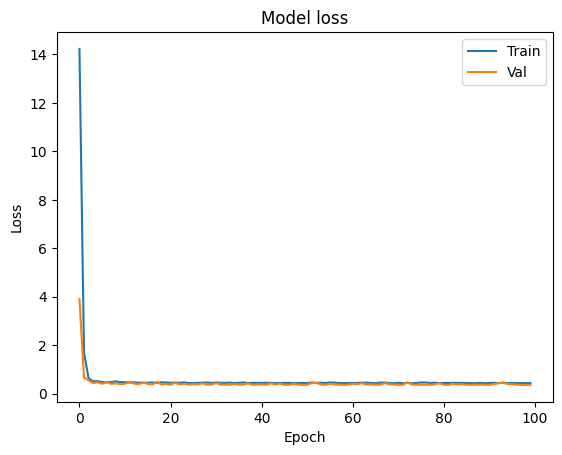

In [32]:
# Plot training and validation loss for the updated model
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
